# BoomBikes Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**So interpretation is important!**

## Step 1: Reading the Data

Let us first import NumPy and Pandas and read the boombikes dataset

In [51]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [287]:
boombikes = pd.read_csv("day.csv")

In [133]:
# Check the head of the dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the boombikes dataframe

In [55]:
boombikes.shape

(730, 16)

In [56]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [57]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Understanding the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### 2.1 Cleaning Data:
As mentioned in the case study, some data require handling in different ways.

The following fields are potentially causing multicollinearity, so avoid confusing the model, we'll drop them:
- Since the sum of `registered` and `casual` is stored in `cnt`, so to avoid multicollinearity, it'll drop both columns
- The field `atemp` and `temp` will confuse the model. In reality, people would make decisions based on the real feel of the weather, so `temp` is to be dropped.

Other unnecessary fields are dropped for the reasons mentioned below:
- The field `instant` is irrilevant to the data analysis, it's just a numeric counter for instances.
- The field `dteday` is already represented in `mnth` and `yr` more efficiently, so to avoid confusion, it'll be dropped.
- The field `workingday` can be dropped as it's represented as `0` if `weekday` is `0` or `6`.


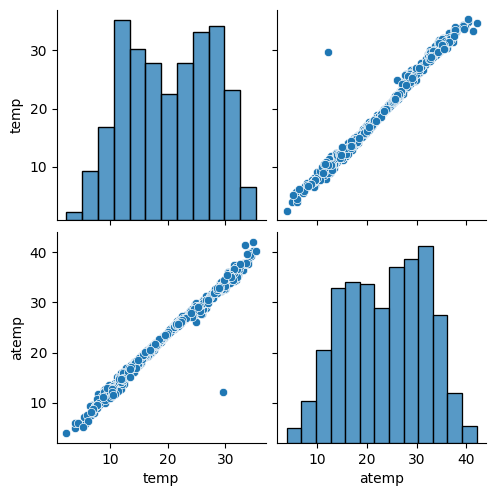

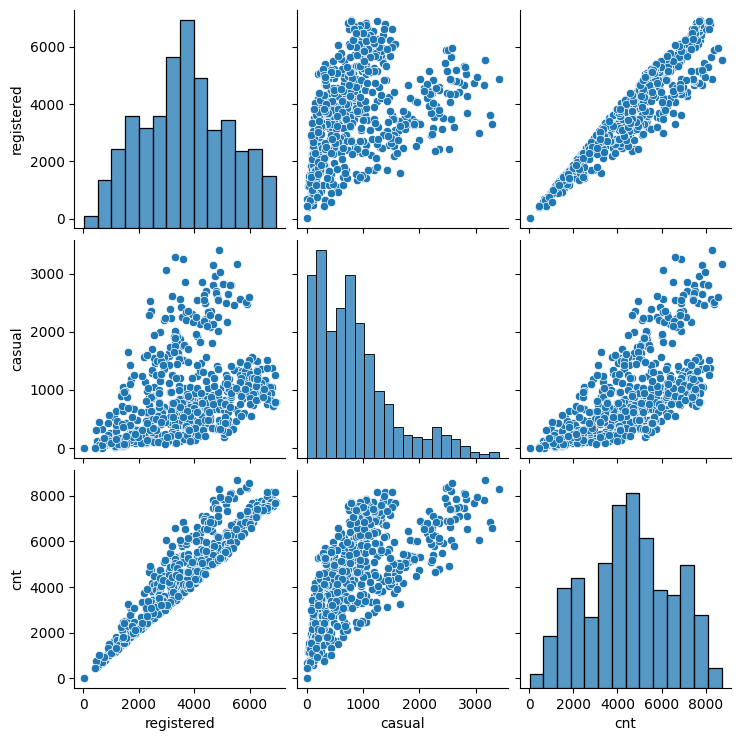

In [97]:
# Validating the above assumptions by plotting some graphs
sns.pairplot(data=boombikes, vars=['temp','atemp'])
plt.show()
sns.pairplot(data=boombikes, vars=['registered','casual','cnt'])
plt.show()


In [288]:
boombikes = boombikes.drop(columns=['registered','casual','instant','dteday','workingday','temp'], axis=1)

In [138]:
# Read the data again
boombikes.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,1600


In [60]:
boombikes.shape

(730, 10)

#### 2.2 Enhance Readability
For the rest of the columns, we'll rename some fields to enhance the readability (e.g.: mnth to month, yr to year, and so on)

In [289]:
boombikes = boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [200]:
boombikes.head()

,season,year,month,holiday,weekday,weathersit,atemp,humidity,windspeed,count
0,1,0,1,0,6,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,1600


Next, we'll map some the categorial variables to their corresponding string values

In [290]:
varSeason = ['season']
# Defining the map function
def binary_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

boombikes[varSeason] = boombikes[varSeason].apply(binary_map)

In [291]:
varYear = ['year']
def binary_map(x):
    return x.map({0: '2018', 1: '2019'})

boombikes[varYear] = boombikes[varYear].apply(binary_map)

In [292]:
varMonth = ['month']
def binary_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

boombikes[varMonth] = boombikes[varMonth].apply(binary_map)

In [293]:
varWeekday = ['weekday']
# Defining the map function
def binary_map(x):
    return x.map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

boombikes[varWeekday] = boombikes[varWeekday].apply(binary_map)

In [294]:
varWeathersit = ['weathersit']
# Defining the map function
def binary_map(x):
    return x.map({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})

boombikes[varWeathersit] = boombikes[varWeathersit].apply(binary_map)

## Step 3: Visualising Data

Now, we'll start visualizing data using plots and heatmaps to understand the correlation between variables

In [295]:
boombikes.head()

,season,year,month,holiday,weekday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,Clear,11.46350,43.6957,12.522300,1600


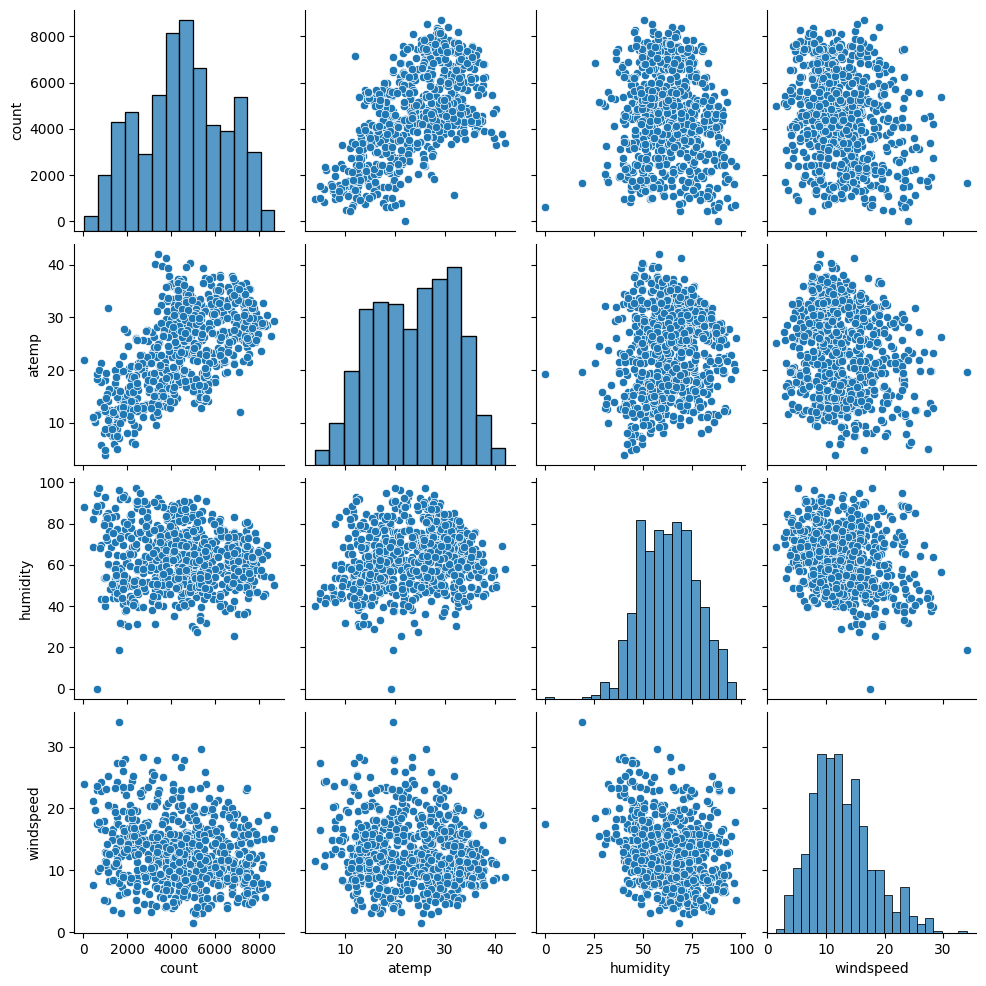

In [296]:
# Start with pairplotting the numeric values

sns.pairplot(data=boombikes, vars=['count','atemp','humidity','windspeed'])
plt.show()

**Observation:** The total `count` of users is highly impacted by the realfeel of `atemp`.

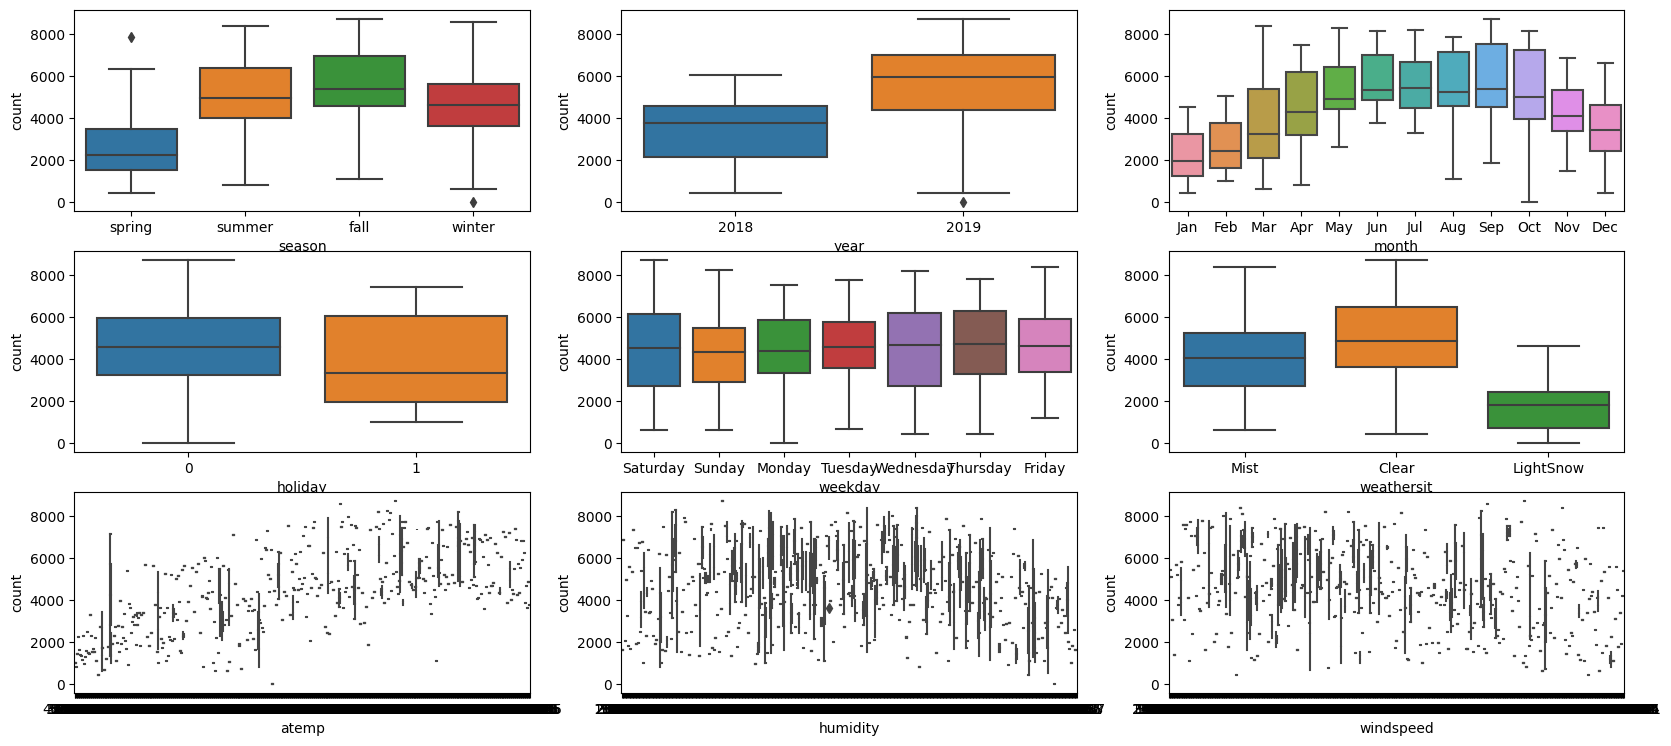

In [85]:
# Next, boxplotting categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes)
plt.subplot(4,3,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes)
plt.subplot(4,3,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes)
plt.subplot(4,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes)
plt.subplot(4,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes)
plt.subplot(4,3,6)
sns.boxplot(x = 'weathersit', y = 'count', data = boombikes)
plt.subplot(4,3,7)
sns.boxplot(x = 'atemp', y = 'count', data = boombikes)
plt.subplot(4,3,8)
sns.boxplot(x = 'humidity', y = 'count', data = boombikes)
plt.subplot(4,3,9)
sns.boxplot(x = 'windspeed', y = 'count', data = boombikes)
plt.show()

**Observations:**
- There's a huge increase in rentals in `2019`.
- The `fall` season of `2019` is the highest, followed by the `summer`.
- The `spring` season in both years shows very low rent rates.
- Rentals across the week is consistent, people are renting bikes during `holiday` and `weekdays`.
- There's no single day representing `HeavyRain` in the dataset.
- The fields `atemp`, `humidity`, and `windspeed` need further handling (scaling) to be readable, which will be done after splitting data into train and test sets.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `year` and `count` with `season` as the hue.

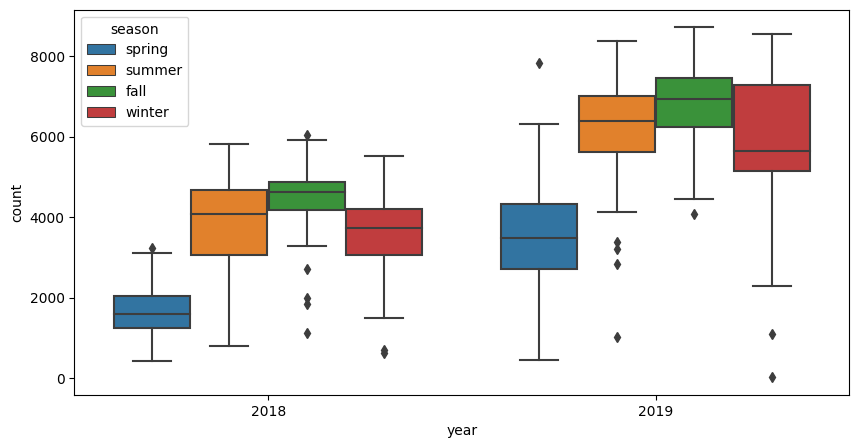

In [90]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'count', hue = 'season', data = boombikes)
plt.show()

**Observations:** 
- The rents across all seasons are much higher in `2019`.
- Still the `spring` season is the lowest by far, but the `winter` season is showing higher interest in `2019` compared to `2018`.

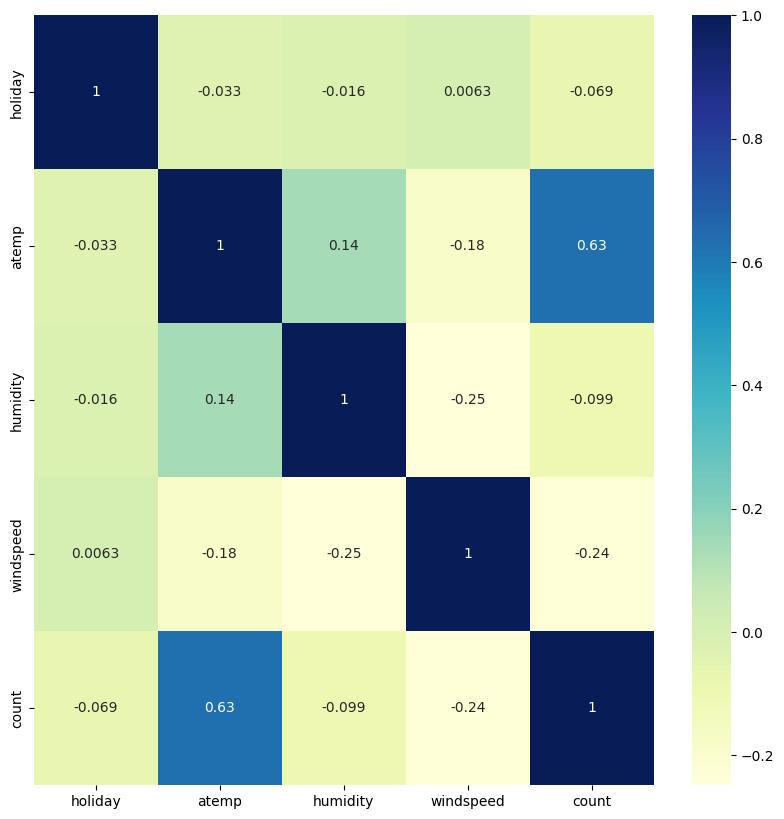

In [297]:
# Checking for correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Across all numerical variables, `atemp` is the only field with positive AND high correlation with `count`.
- This is not enough at all to build the model, since the categorical variables are not yet converted into dummy numerical variables to understand their imapct.

## Step 3: Data Preparation

### Dummy Variables

The categorical variables `month`, `season`, `weekday` and `weathersit` need to have dummy variables out of them to realisticly visualize their components, and understand their impact.

In [298]:
# Get the dummy variables for the features/categorical variables below
# We'll handle 'season' separately
dummy = boombikes[['month','weekday','weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True)

In [299]:
# Adding the new dummy variables to the BoomBikes data set
boombikes = pd.concat([dummy, boombikes], axis=1)

Regarding getting dummy variables for the feature `season`, since we know from the previous visuals that `fall` has the highest rental rate, it's not preferred to use `drop_first` to avoid dropping `fall`, so we'll purposefully drop `spring` as being of a least impact.

In [300]:
dummySeasons = boombikes['season'].str.get_dummies().drop('spring',axis=1)
dummySeasons.columns

Index(['fall', 'summer', 'winter'], dtype='object')

In [301]:
boombikes = pd.concat([dummySeasons, boombikes], axis=1)

In [302]:
# Check what the new dataset looks like
boombikes.shape

(730, 32)

In [303]:
boombikes.columns

Index(['fall', 'summer', 'winter', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_LightSnow',
       'weathersit_Mist', 'season', 'year', 'month', 'holiday', 'weekday',
       'weathersit', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

The `drop_first` is helpful to apply the rule `(n-1)` for the needed number of dummy variables:

- `spring` is dropped as being `0` in all other `seasons` columns
- `Apr` is dropped as being `0` in all other `months` columns
- `Friday` is dropped as being `0` in all other `weekdays` columns
- `HeavyRain` has no existence in the data set, so it was dropped automatically.
- `Clear` is dropped as being `0` in all other `weathersits` columns

In [304]:
# Now let's see the head of our dataframe.

boombikes.head()

,fall,summer,winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,season,year,month,holiday,weekday,weathersit,atemp,humidity,windspeed,count
0,0,0,0,0,0,0,1,0,0,0,...,spring,2018,Jan,0,Saturday,Mist,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,1,0,0,0,...,spring,2018,Jan,0,Sunday,Mist,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,1,0,0,0,...,spring,2018,Jan,0,Monday,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,1,0,0,0,...,spring,2018,Jan,0,Tuesday,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,1,0,0,0,...,spring,2018,Jan,0,Wednesday,Clear,11.46350,43.6957,12.522300,1600


In [247]:
# Drop the columns which dummy variables were created against
# Dropping 'month', 'season','weekday','weathersit'
boombikes = boombikes.drop(['month', 'season','weekday','weathersit'], axis=1)

In [248]:
# Check what the new dataset looks like
boombikes.shape

(730, 28)

In [249]:
boombikes.head()

,fall,summer,winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist,year,holiday,atemp,humidity,windspeed,count
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,2018,0,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,2018,0,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2018,0,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,2018,0,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,2018,0,11.46350,43.6957,12.522300,1600


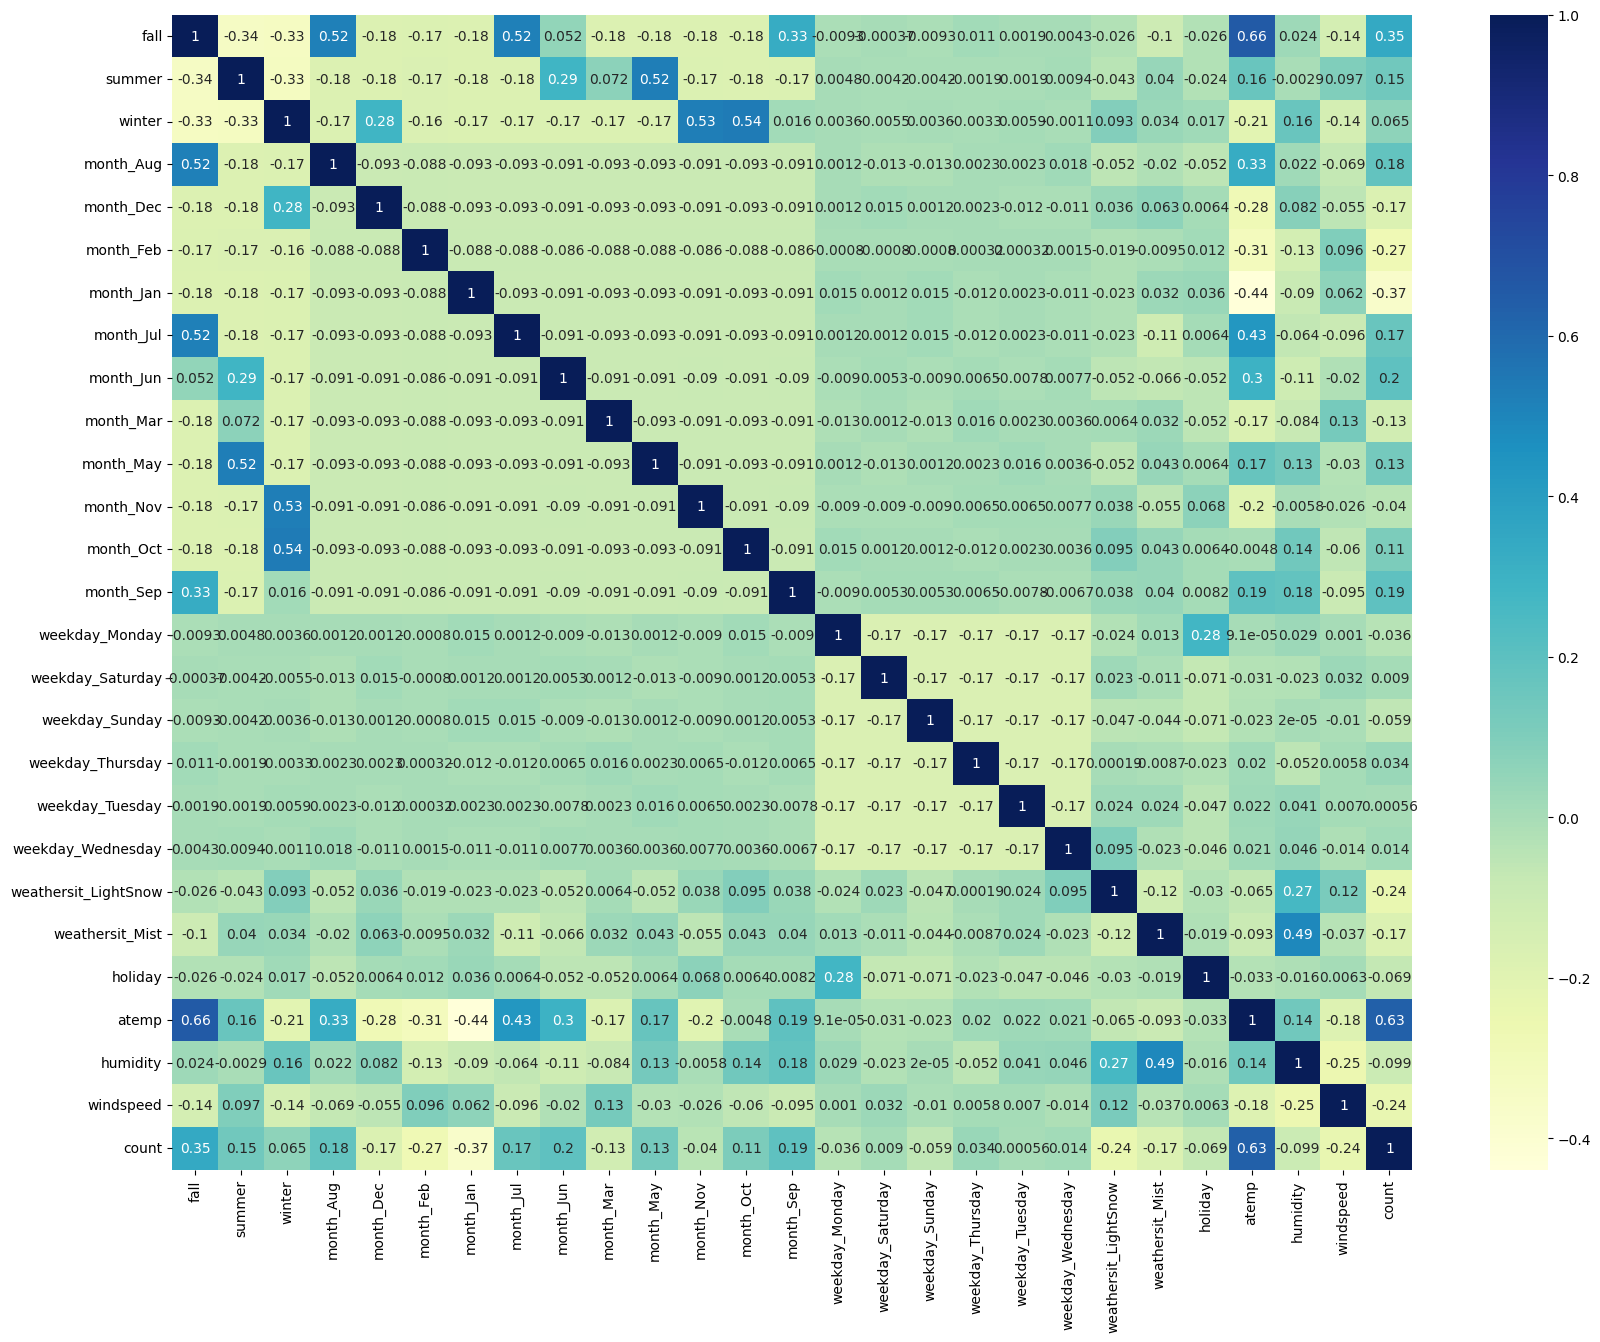

In [305]:
# Re-draw the heatmap with the new derived variables
plt.figure(figsize=(20,15))
sns.heatmap(boombikes.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
- Still `atemp` is the highest correlated variable with `count`.
- Months of `Jun`, `Jul`, `Aug` and `Sep` are of the highest correlation across `months`.
- The season `fall` has the highest correlation with `count`, followed by `summer`.
